# **Intro to 'Council' by ChainML**
### Agents, Chains, and Skills

## Council

'[Council](https://council.dev/en/stable/index.html)' is an open-source platform for rapidly developing customized generative AI applications using collaborating ‘agents’. The platform enables the robust deployment and monitoring of generative AI models ensuring they can be operated with confidence and accuracy. Use it to automate Generative AI workflows and create new productivity tools.
`Council Version 0.0.14`


## ChainML
[ChainML](https://www.chainml.net/) is a startup that works with clients on AI ideation, education, adoption, and implementation; from an AI product idea to a scalable and affordable deployment. We are a team of seasoned data scientists and Engineers committed to the responsible development and use of AI. Join our Discord community and sign up for our newsletter for more great tutorials and AI news.


# Tutorial: Agents, Chains, and Skills

In this tutorial, learners will set up an AI agent using the Council framework. Learners will construct different "skills" and "chains" that the agent can use to generate smart responses.

This approach, with multiple AI components each specializing in a certain type of response, provides more nuanced and accurate outputs compared to using a single general AI tool like ChatGPT and it automates a GenAI workflow.

## Important Prerequisites and Notes

API keys for third party tools are **not** provided but they are straightforward to get.

In this tutorial, you will be asked to insert your own OpenAI key. If you do not have an OpenAI API Key, visit the OpenAI [website](https://openai.com/blog/openai-api) to learn about the subscription options.

This tutorial requires a knowledge of Python and Colab, as well as a stable internet connection.

-- Please also note that running this tutorial many times can run into the maximum number of API calls you are allowed in a period. Read any code errors careful and you can use ChatGPT to hep you debug.

## Definitions

In this tutorial you will learn an efficient and scalable approach to building AI systems! We will cover the concepts of **agents**, **chains**, and **skills** and create our own instances of them. Think of Council's framework like an orchestra. The 'Agent' acts as the conductor, directing the performance. 'Chains' are the various sections of the orchestra, each with its own unique instruments, which are the 'Skills'. The conductor (Agent) coordinates the sections (Chains) to play their instruments (Skills) in harmony, producing a beautiful symphony of AI responses, perfectly tuned to the situation at hand. Here are some definitions. Look out for these terms in the code:



### Agent
The agent is akin to the manager at a help desk. It is responsible for overseeing the entire operation, from the moment a customer query is received until a final response is given. The agent delegates the responsibility of deciding which teams (chains) to engage based on the nature of the query to the controller.



### Controller
The controller is the manager's decision-making strategy at a help desk. Instead of choosing individual team members (skills), it determines which teams (chains) are best suited to address the customer's query. The controller is entrusted by the agent to choose the right chain.


### Skill
Skills are the different teams at the help desk, each with their unique expertise, such as dealing with technical issues or customer complaints. When given a task, they work on it and provide their solutions.


### Chain
A chain is a group of team members (skills) picked to work together to address a specific problem. The agent (manager) does not choose the chain directly but delegates that responsibility to the controller.


### Evaluator
The evaluator acts like a quality assurance system. It doesn't assess the responses from individual team members (skills), but evaluates the responses from the teams (chains). The evaluator assists the agent (manager) in selecting the best overall response, ensuring the customer receives a quality solution.


### State Management
State management is like the record-keeping system at the help desk. It tracks the history of customer interactions, solutions provided, and other important details. This record assists the agent (manager) in making informed decisions, enhancing the overall efficiency of the help desk.

### Budget

In Council's framework, a "budget" ensures that AI agents operate within set limits, like execution time or resource consumption. These limits prevent excessive resource use, extended execution times, or making too many calls to external services. Budget types include:

1. Time Budget: Caps the execution duration.
2. Token Budget: Limits the number of words or characters the agent can use, useful for controlling response lengths or processing volumes.
3. Call Budget: Restricts the number of API calls or external requests the agent can make.

#### Budgets are crucial for:

* Ensuring fair resource usage in environments with multiple users.
* Controlling costs, especially when using cloud-based services.
* Maintaining system safety by avoiding infinite executions or crashes.
* Predicting agent behavior and planning resources accordingly.
* Preventing system overloads from poorly designed or malicious agents.

An example in the documentation illustrates how to set these budgets in code.

# Tutorial Use Case
In this tutorial you will build a marketing assistant to help generate the right content for the right social media platform. You will enter your post idea and this AI assistant will decide which platform is most suitable for your prompt and produce the best content for the best platform to maximize engagement and revenue based on your original post idea. You may be an influencer looking to automate your workflows, a marketer working at an agency, or a developer dabbling with new AI tools, this use case is just the tip of the iceberg. After this tutorial, get creative about how you can use Agents, Chains, and Skills. The platform options in this tutorial are:

* XorTwitter
* LinkedIn
* Discord

Never stop learning!

# **Tutorial Steps**

## Install the council-ai library

In [ ]:
!pip install council-ai
# Learn more about council-ai and contribute to the open source code on GitHub
# Council repo: https://github.com/chain-ml/council
# Council documentation: https://council.dev/en/latest/index.html

## Import the required modules
Import the required modules from the Council framework.

In [ ]:
# Import required modules. This block imports all the required libraries for our project.
# Each one serves a specific function in creating our Council AI agent.

import dotenv
import os
import logging

from council.chains import Chain
from council.skills import LLMSkill
from council.filters import BasicFilter
from council.llm import OpenAILLM, OpenAILLMConfiguration
from council.controllers import LLMController
from council.evaluators import LLMEvaluator
from council.agents import Agent





## Configure logging

In [ ]:
# Next, we configure the logging for our application.
# This helps us to keep track of the execution flow and debug any issues that might occur.
# We set up a basic logging configuration to record the application's actions.
# The getLogger line specifically configures the logging level for the Council library.

logging.basicConfig(
    format="[%(asctime)s %(levelname)s %(threadName)s %(name)s:%(funcName)s:%(lineno)s] %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S%z",
)
logging.getLogger("council").setLevel(logging.DEBUG)


## Set up the environment variables
Next, we will set up our environment variables, specifically the API key for OpenAI and the model we will be using. Make sure to replace 'your_api_key_here' with your actual OpenAI API key and note the model being used.



In [ ]:
# Replace 'OPENAI_API_KEY' with your actual API key and note the LLM model being used in 'OPENAI_LLM_Model'. The model may change.
# ChainML may include an API key for this tutorial for hackathons and conferences. You may not use our API key for activities outside of this tutorial.
# If you do not have an API key, you can get one from the OpenAI website.
# Get an OpenAI API key: https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key

# Setup environment variables
dotenv.load_dotenv()
os.environ['OPENAI_API_KEY'] = 'Your API KEY HERE'
os.environ['OPENAI_LLM_MODEL'] = 'gpt-4-1106-preview'
os.environ['OPENAI_LLM_TIMEOUT'] = '90'


## Initialize the LLM

In [ ]:
# Initialize OpenAI LLM (Large Language Model)
# Here, we create an instance of OpenAILLM, which is a wrapper around the OpenAI language model,
# configured based on our environment variables.

openai_llm = OpenAILLM.from_env()


## Skills and Chains
In this step, we will set up our skills and chains. The skills are the actions that our agent can take, and the chains represent sequences of skills that the agent can use to generate a response.

In this block, we define three skills: XorTwitter, LinkedIn, and Discord. Each one has a unique prompt and uses the LLM to generate a response. We then create chains for each skill, which can be sequenced to generate a final response from the agent.

In [ ]:
# Create the short content 'XorTwitter' Skill and Chain
prompt_XorTwitter = "You are a social media influencer with millions of followers on Twitter because of your short humorous social media posts that always use emojis and relevant hash tags."
XorTwitter_skill = LLMSkill(llm=openai_llm, system_prompt=prompt_XorTwitter)
XorTwitter_chain = Chain(name="XorTwitter", description="Responds to a prompt, which is a short sarcastic and humorous post idea.", runners=[XorTwitter_skill])

# Create a professional content 'LinkedIn' Skill and Chain
prompt_LinkedIn = "You are a social media influencer with millions of followers on LinkedIn because of your compelling short professional business posts that generate lots of engagement."
LinkedIn_skill = LLMSkill(llm=openai_llm, system_prompt=prompt_LinkedIn)
LinkedIn_chain = Chain(name="LinkedIn", description="Responds to a prompt, which is a post idea, written in formal businesss language using big words.", runners=[LinkedIn_skill])

# Create a longer 'Discord' Skill and Chain
prompt_Discord = "You are a social media influencer with millions of followers on Discord because of your compelling short social media posts."
Discord_skill = LLMSkill(llm=openai_llm, system_prompt=prompt_Discord)
Discord_chain = Chain(name="Discord", description="Responds to a prompt, which is a post idea, as an expert Discord influencer and generates a Discord post.", runners=[Discord_skill])

## Create a controller and evaluator
The controller and evaluator are key components of our agent. The controller decides which chains to use based on the user's prompt, and the evaluator grades the responses to decide which one is the best.

Here, we instantiate a controller and an evaluator for our agent. The controller makes decisions on which chains to use, while the evaluator grades the chains' responses.

In [ ]:
# Create Controller
controller = LLMController(chains=[XorTwitter_chain, LinkedIn_chain, Discord_chain], llm=openai_llm, response_threshold=5)

# Create Evaluator
evaluator = LLMEvaluator(llm=openai_llm)

# Create Filter
filter = BasicFilter()


## Create the agent
We now combine all the components to create our agent. This agent will use the controller, chains, and evaluator we defined to generate responses to prompts.

We create our agent by specifying the controller, the list of chains, and the evaluator that it should use.



In [ ]:
# Create Agent
agent = Agent(controller=controller, evaluator=evaluator, filter=filter)


## Create a context
Finally, we will give our agent a message to respond to. We create a chat history context, add our user message to it, and then ask the agent to come up with a response to the user message. We print the best response received from the agent.

## Enter your prompt and invoke the agent

* Invoke the agent by passing a user message to it.
* Edit line of code: `chat_history.add_user_message` in the next code block ("------------").
* Insert your text between the double quotes "------------"

The response will be at the bottom of the output.



In [ ]:
result = agent.execute_from_user_message("Open Data Conference")

#for message in result.messages:
print("\n" + result.best_message.message)

#OpenAI models may time-out due to high traffic, retry this step immediately or try this step later


In [ ]:
#for message in result.messages:
print("\n" + result.best_message.message)

## Examples
Here are some example inputs to invoke the 3 different chains:

1.   For the 'XorTwitter' Skill:
Prompt: "*What is the sum of two and three*"
2.   For the 'LinkedIn' Skill:
Prompt: "*Job Search*"
3. For the 'Discord' Skill:
Prompt: "*Game Night Announcement*"

Try the same questions in ChatGPT directly and note the different responses. Now try your own input text. The response will be at the bottom of the output.





# Conclusion
In this tutorial, we have built unique AI skills using the **Council AI framework** and managed them using **Agents** and **Chains**. We have implemented decision-making functionality using **Controllers** that direct inputs to the appropriate **skills**. We have also established quality control measures by employing **Evaluators**, ensuring the generation of high-quality AI responses to our prompts. We are now equipped to produce an automated system with diverse, high-quality AI responses, beyond using a linear (one prompt at a time) workflow with ChatGPT.



---


# Contact Information
**Congratulations, you have completed a generative AI tutorial by ChainML!**

Next steps, try Council for yourself and share your projects with us - we highlight great use cases with our community!

***Never stop learning!***

```
Instructor: Shingai Manjengwa
Development input: Daniel Kur and David Muller
Title: Head of AI Education
X (Twitter): @tjido, @chainml_
Contact: info@chainml.net
Website: https://www.chainml.net

```


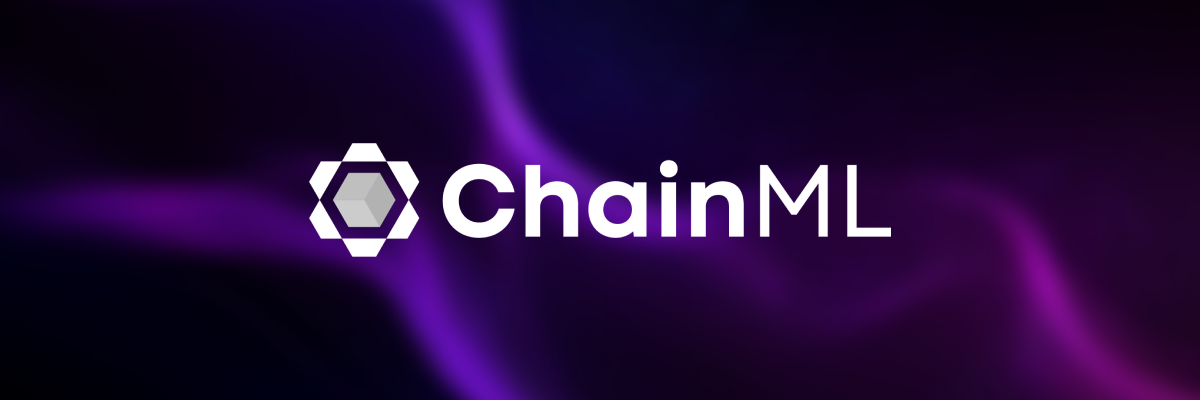